In [3]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [8]:
df=pd.read_csv('data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [9]:
data_dict=df.columns

In [31]:
data_dict[1]

' ROA(C) before interest and depreciation before interest'

In [12]:
str=' ROA(C) before interest and depreciation before interest'
data_dict.get_loc(str)

1

In [46]:
for i in range(1,len(df.columns)):
    df.rename(columns={df.columns[i]:f"X{i}"},inplace=True)
    
df

,Bankrupt?,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


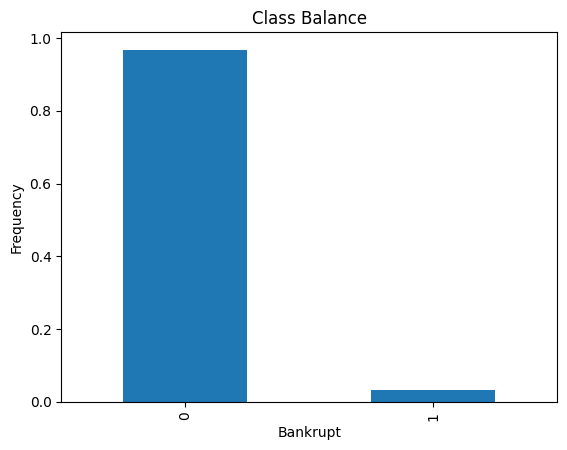

In [16]:
# Plot class balance
df['Bankrupt?'].value_counts(normalize=True).plot(
    kind='bar',
    xlabel='Bankrupt',
    ylabel='Frequency',
    title='Class Balance'
);

In [63]:
def feat_boxplot(feat,clipped=False):
    num=int((list(feat)[1]))
    
    
    sns.boxplot(x='Bankrupt?', y=feat, data=df)
    plt.xlabel("Bankrupt")
    plt.ylabel(f"{data_dict[num].strip()}")
    plt.title(f"Distribution of {data_dict[num].strip()}, by Bankruptcy Status");
    
    if clipped ==True:
        q1,q9=df[feat].quantile([0.1,0.9])
        mask = df[feat].between(q1,q9)
        sns.boxplot(x='Bankrupt?', y=feat, data=df[mask])
        plt.xlabel("Bankrupt")
        plt.ylabel(f"{data_dict[num].strip()}")
        plt.title(f"Clipped Distribution of {data_dict[num].strip()}, by Bankruptcy Status");
   


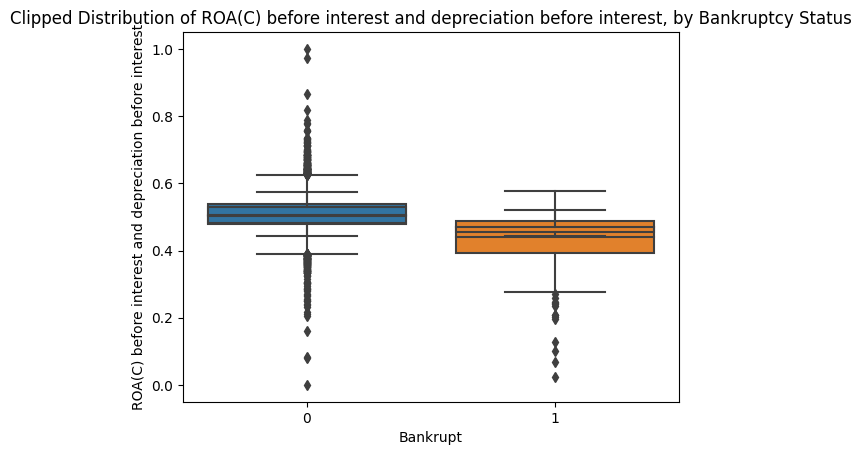

In [64]:
feat_boxplot('X1',clipped=True)

In [78]:
def feat_hist(feat, clipped):
    num=int((list(feat)[1]))
    if clipped ==False:
        df[feat].hist()
        plt.xlabel(f"{data_dict[num].strip()}")
        plt.ylabel("Count"),
        plt.title(f"Distribution of {data_dict[num].strip()}");

    
    if clipped ==True:
        q1,q9=df[feat].quantile([0.1,0.9])
        mask = df[feat].between(q1,q9)
        df.loc[mask, feat].hist()
        plt.xlabel(f"{data_dict[num].strip()}")
        plt.ylabel("Count"),
        plt.title(f"Clipped Distribution of {data_dict[num].strip()}");
    
    


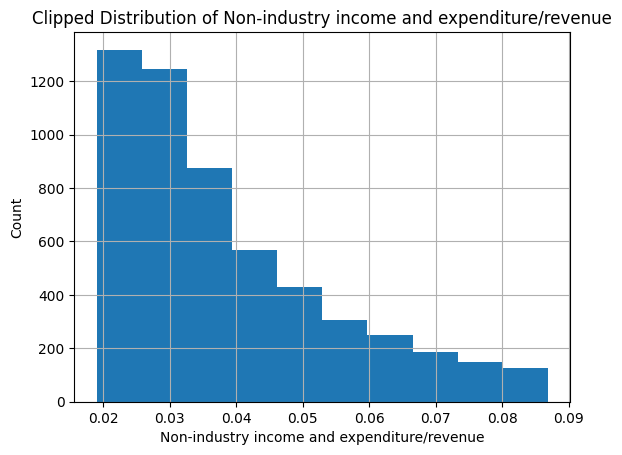

In [79]:
feat_hist('X95',clipped=True)

In [81]:
target = "Bankrupt?"
X = df.drop(columns=target)
y = df[target]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)

In [88]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


In [89]:
from sklearn.tree import DecisionTreeClassifier

# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [90]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9531
Training Accuracy: 0.813
Test Accuracy: 0.8057
Training Accuracy: 1.0
Test Accuracy: 0.9604


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

In [93]:
clf = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state=42))

In [92]:
params = {
    'simpleimputer__strategy': ['mean', 'median'],
    'randomforestclassifier__n_estimators': range(25,100,25) ,
    'randomforestclassifier__max_depth': range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [94]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [95]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [96]:
model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

In [97]:
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9663


In [98]:
y_test.value_counts()

Bankrupt?
0    1313
1      51
Name: count, dtype: int64

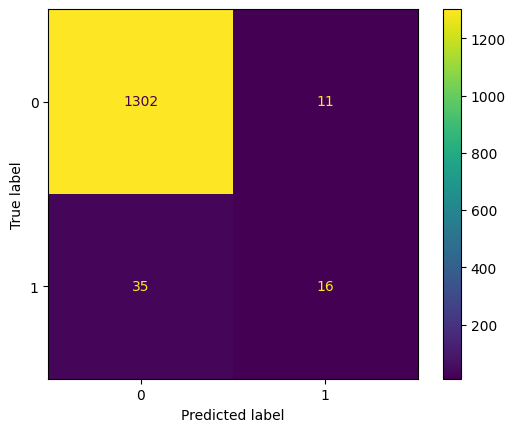

In [99]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [102]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)

In [106]:
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def make_cnf_matrix(threshold, tp_profit, fp_loss):
    y_pred_proba = model.predict_proba(X_test)[:, -1]
    y_pred = y_pred_proba > threshold
    conf_matrix = confusion_matrix(y_test, y_pred)
    tp, fp, fn, tn = conf_matrix.ravel()

    total_profit = tp * tp_profit 

    print(f"Profit: €{total_profit}")
    print(f"Loss: €{fp * fp_loss}")
    print(f"Net Profit: €{total_profit - fp * fp_loss}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False)

thresh_widget = widgets.FloatSlider(min=0, max=1, value=0.5, step=0.05)
tp_profit_widget = widgets.IntText(value=100_000_000, description='Correct Prediction Profit')
fp_loss_widget = widgets.IntText(value=250_000_000, description='False Prediction Loss')

# Directly access widget values in the function
interact(make_cnf_matrix, threshold=thresh_widget, tp_profit=tp_profit_widget, fp_loss=fp_loss_widget);


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), IntText(value=10000…